Chapter Two: Recursion
**********************

Section 1. Introduction
-----------------------

Loops and iterations (such as for- and while- loops) are the most usual way to implement the concept of repetition
of a task in Python. An alternative way, closer to the inner nature of functions, is the recursion.

The word *recursive* originates from the Latin verb *recurrere*, meaning *to run back*.
The most used, and abused, example of a recursive definition is that of the factorial function, which can be defined as
\\(n! = n * (n-1)!\\), if \\(n > 1\\) and \\(0! = 1\\). For example, \\(4!=4*3!=4*3*2!=4*3*2*1!=4*3*2*1*0!=24\\).
Fractal patterns are recursive.
Matryoshka dolls are recursive.
Each doll is either made of  wood, or it contains another doll.

In general, a function (or a program) is called recursive when it calls itself in its body,
returning the value of this function call.
Every call must be applied on a smaller version of the input,
moving towards a base case (a case where the function can be computed without any further recursion).
In the previous example, when the computation hits the case \\(0!\\), the value \\(1\\) is returned to the previous call.

The definition of the factorial in Python is the following:

In [1]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

As the reader can see, ``factorial(n)`` calls ``factorial(n-1)``, and so on, until the base case \\(0!\\) is reached.
This function does not use any explicit loops, and repetition is provided by the recursive calls of ``factorial``.
Each time the function is invoked, its argument is smaller by one, and when the base case is reached,
the integer \\(1\\) is returned.

In order to track the behavior of the recursion, we can add a couple of ``print()`` to the code:

In [2]:
def factorial(n):
    print("factorial is called with n = " + str(n))
    if n == 1:
        return 1
    else:
        res = n * factorial(n-1)
        print("intermediate result for ", n, " * factorial(" ,n-1,"): ",res)
        return res

print(factorial(4))

factorial is called with n = 4
factorial is called with n = 3
factorial is called with n = 2
factorial is called with n = 1
intermediate result for  2  * factorial( 1 ):  2
intermediate result for  3  * factorial( 2 ):  6
intermediate result for  4  * factorial( 3 ):  24
24


This script has the following results, when ``factorial`` is called with input 4:


    factorial is called with n = 4
    factorial is called with n = 3
    factorial is called with n = 2
    factorial is called with n = 1
    intermediate result for 2 * factorial( 1 ): 2
    intermediate result for 3 * factorial( 2 ): 6
    intermediate result for 4 * factorial( 3 ): 24
    24


The iterative program that computes the same function is:

In [4]:
def iter_factorial(n):
    res = 1
    for i in range(2, n+1):
        res *= i
    return res

A few programming languages (like Scheme or Smalltalk) do not support looping constructs and instead rely directly on recursion to express repetition. Most programming languages support
recursion using the same mechanism that is used to support function calls: if one call of the function is a recursive one, that call is suspended until the recursive call is completed.

In Python (and in the majority of programming languages), each time a function is called,
a structure known as an *activation record* or *frame* is created
in order to store information about that invocation of the function. The activation record keeps track
of the function call’s parameters, of the local variables, and of the information about which command
in the body of the function is currently executed.
When the execution of a function leads to another function call, the execution
of the former call is suspended and its activation record stores the place in the
source code at which the control-flow must return after the execution of the nested call.
This process is used both in the standard case of one function calling a different
function, or in the recursive case in which a function invokes itself.
Thus, there is a different activation record for each active call.

Recursion is of paramount importance in the study of data structures and algorithms.

Section 2. Some examples of recursive algorithms
------------------------------------------------

Section 2.1 Binary search
=========================

Binary search is a recursive algorithm that finds a target value inside a sorted sequence of \\(n\\) elements.
This sequence can be, in Python, any indexable sequence, such as a list or an array.
The straightforward approach to search for a target value into an unsorted sequence is to use the
*sequential search* algorithm.
A loop is used to examine every element, until either the target has been found or the data set is exhausted.
This algorithm runs in \\(O(n)\\) time (i.e., linear time), since every element must be inspected, in the worst case.

When a sequence ``data`` is sorted and indexable, the binary search is much more efficient.
Note that for any index \\(j\\), all the values stored at indices \\(0, \ldots, j-1\\)
are less than, or equal to, the value at index \\(j\\),
and all the values stored at indices \\(j+1, \ldots ,n-1\\) are greater than, or equal to, the value at index \\(j\\).

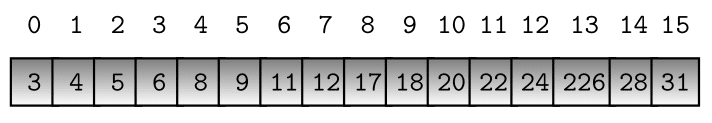


An element of the sequence is a *candidate* if, at the current stage, we cannot rule out that this item matches the target.
The algorithm has two parameters, *low* and *high*, such that all the potential candidates have index between *low* and *high*.
Initially, \\(low = 0\\) and \\(high =n-1\\) (that is, all the elements of the sequence are candidates).

We compare the target value to the median candidate, that is, the item ``data[mid]`` with index
\\(mid = \lfloor(low+high)/2 \rfloor\\). We have three cases:

- the target is equal to ``data[mid]``, then the search is successful;
- the target is less than ``data[mid]``, then we recur on the first half of the sequence (on the interval of indices from low to mid-1);
- the target is greater than ``data[mid]``, then we recur on the second half of the sequence (on the interval of indices from mid+1 to high).

An unsuccessful search occurs when \\(low > high\\). Note that whereas a sequential search runs in \\(O(n)\\) time,
the binary search runs in \\(O(\log n)\\) time. A Python implementation of the binary search is given below:

In [5]:
def binary_search(data, target, low, high):
    '''Return True if target is found in data, between low and high'''
    if low > high:
        return False               # no match found
    else:
        mid = (low + high) / 2
        if target == data[mid]:    # found a match
            return True
        elif target < data[mid]:
            return binary_search(data, target, low, mid - 1)   # call on the left portion
        else:
            return binary_search(data, target, mid + 1, high)  # call on the right portion

In the following figure we search for the value 18.

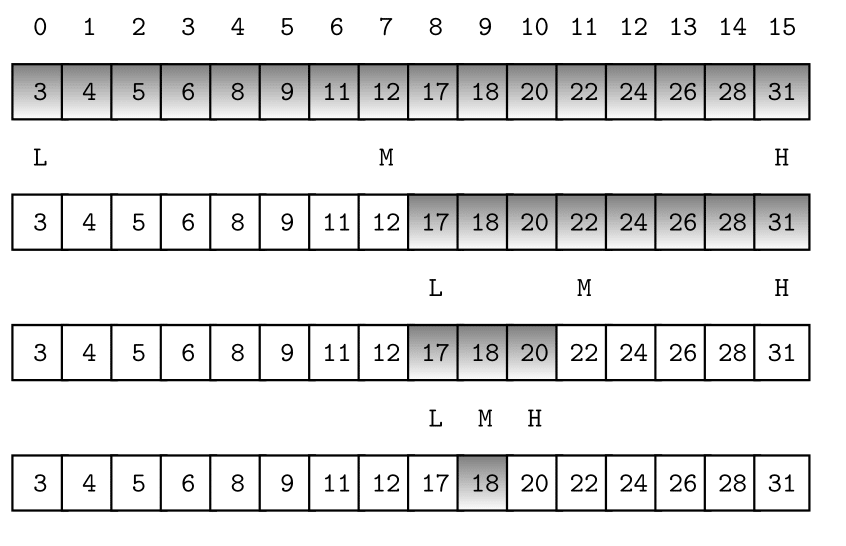

Section 2.2 Reversing a sequence
================================

Let \\(A\\) be an indexed sequence, and consider the problem of reversing the elements of \\(A\\);
the first element becomes the last, the second element becomes second to the last, and so on.
Note that it is possible to reverse a sequence by swapping the first and last elements,
and recursively reversing the remaining elements.
A Python implementation is given below:

In [6]:
def reverse(A, first, last):
    '''Reverse elements in A, between first and last'''
    if first < last - 1:                           # if there are at least 2 elements
        A[first], A[last-1] = A[last-1], A[first]    # swap first and last
        reverse(A, first+1, last-1)

If ``first == last``, there is no sequence to reverse; if ``first == last-1``,
the sequence is composed by a single element. In both cases, we have reached the base case of the recursion.
If there is a sequence to reverse, the algorithm will stop after \\(1+\lfloor n/2 \rfloor\\) steps.
Since each call requires a constant amount of work, the algorithms runs in \\(O(n)\\) time.

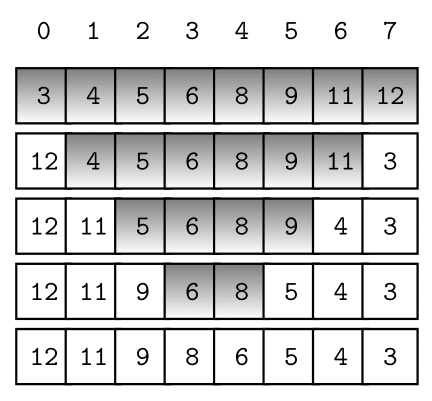

Section 2.3 Summing the elements of a sequence
==============================================

Let \\(A\\) be an indexed sequence on integers, and consider the problem of summing the elements of \\(A\\).
Note that the sum of all \\(n\\) integers in \\(A\\) is the sum of the first \\(n-1\\) integers in \\(A\\),
plus its last element.
This is clearly a recursive definition, and it is called *linear recursion*. We provide the Python coding below:

In [7]:
def linear_sum(A, n):
    '''Returns the sum of the first n numbers of A'''
    if n == 0:
        return 0
    else:
        return A[n-1] + linear_sum(A, n-1)

For an input of size \\(n\\), the algorithm makes \\(n+1\\) function calls.
Since each call requires a constant amount of work, the algorithm runs in \\(O(n)\\) time.

Another approach to the solution of this problem can be the following:
instead of summing the last element of \\(A\\) with the sum of the remaining elements,
we can compute the sum of the first half of \\(A\\) and the sum of the second half of \\(A\\),
recursively, and then add these numbers.
This is a case of *binary recursion*, where two recursive calls are made:

In [8]:
def binary_sum(A, first, last):
    '''Return the sum of the numbers in A between first and last'''
    if first <= last:     # no elements
        return 0
    elif first == last-1:     # one element
        return A[first]
    else:
        mid = (first + last) / 2
        return binary_sum(A, first, mid) + binary_sum(A, mid, last)

To analyze the complexity of this version of the sum, we consider the case where \\(n\\) is a power of 2.
At each recursive call, the size of the sequence is divided by 2,
meaning that the depth of the recursion is \\(1+ \log n\\). The running time of the algorithm is
still \\(O(n)\\), because there are \\(2n-1\\) recursive calls, each requiring constant time.
The same result holds for sequences with any length.

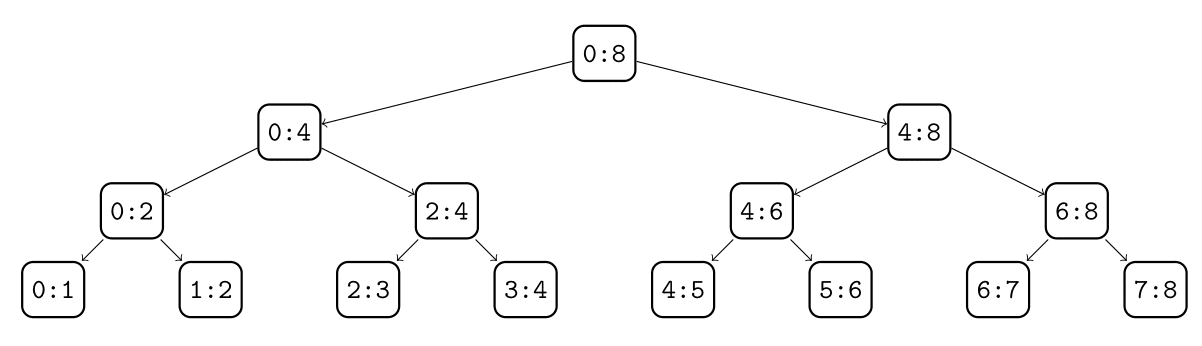

Section 3. Recursion can be inefficient
---------------------------------------

In this section, we examine some problems in which recursive algorithms provoke drastic inefficiency.

Section 3.1 The Fibonacci numbers
=================================

The Fibonacci sequence is named after the mathematician Leonardo da Pisa, better known as Fibonacci.
In his 1200's book "Liber Abaci" he introduced the sequence as an exercise dealing with an artificial
rabbit population, satisfying the following conditions:

- the initial population consists of a newly born pair of rabbits, one male, one female;
- rabbits are able to mate at the age of one month;
- rabbits are immortal;
- a mating pair always produces one new pair (one male, one female) every month from the second month onwards.

The Fibonacci numbers \\(F_n\\) are the numbers of rabbit pairs after \\(n\\) months,
i.e. after 10 months we will have \\( F_{10}\\) rabbits.
Putting aside the mathematical importance of this sequence, note that the Fibonacci numbers can be defined as
\\(F_0 =0\\), or \\(F_1 = 1\\), or \\(F_n = F_{n-2} + F_{n-1}\\).
This is a typical example of binary recursion, and we can easily write the Python code for this function:

In [9]:
def fibonacci(n):
    '''Returns the n-th Fibonacci number'''
    if n <= 1:
        return n
    else:
        return fibonacci(n-2) + fibonacci(n-1)

Let \\(c_n\\) be the number of calls made in an execution of ``fibonacci(n)``.
We have the following values for \\(c_n\\):

* \\(c_0 = 1\\)
* \\(c_1 = 1\\)
* \\(c_2 = 1+c_0+c_1 = 1+1+1 = 3\\)
* \\(c_3 = 1+c_1+c_2 = 1+1+3 = 5\\)
* \\(c_4 = 1+c_2+c_3 = 1+3+5 = 9\\)
* \\(c_5 = 1+c_3+c_4 = 1+5+9 = 15\\)
* \\(c_6 = 1+c_4+c_5 = 1+9+15 = 25\\)
* \\(c_7 = 1+c_5+c_6 = 1+15+25 = 41\\)
* \\(c_8 = 1+c_6+c_7 = 1+25+41 = 67\\)

We see that the natural implementation of the Fibonacci formula results in a quasi-exponential growth of
the number of calls;
this happens because our definition has no memory of the previously calculated values of the sequence, meaning that
each call has to re-calculate values that have been already calculated. For instance, when computing ``fibonacci(6)``,
we have two calls to ``fibonacci(4)``, one made directly by ``fibonacci(6)``, and the second made by ``fibonacci(5)``.
Similarly, we have three calls to ``fibonacci(3)``: the first, made by ``fibonacci(5)``;
the second and the third made by the two instances of ``fibonacci(4)``.

There are more efficient ways to redefine this program. A first approach consists in defining a program that returns
two consecutive Fibonacci numbers, \\( ( F_n ,F_{n-1} ) \\), starting with \\( F_{1}=0 \\).
This allows us to remember the previously
computed value of the sequence, and to pass it to the next level of the computation, instead of re-compute it:

In [10]:
def good_fibonacci(n):
    '''Returns the n-th and the (n-1)-th Fibonacci number'''
    if n <= 1:
        return (n, 0)
    else:
        (a, b) = good_fibonacci(n-1)
        return (a + b, a)

The function ``good_fibonacci(n)`` can be computed in \\(O(n)\\) time.
Indeed, each recursive call decreases the argument \\(n\\) by 1, implying \\(n\\) function calls.
The nonrecursive work for each call requires constant time; thus, the overall computation executes in \\(O(n)\\) time.

We can also implement a memory by using a dictionary to save the previously calculated values:

In [11]:
memo = {0:0, 1:1}
def fibm(n):
    if not n in memo:
        memo[n] = fibm(n-1) + fibm(n-2)
    return memo[n]

A final program can be defined using the method ``__call__``:

In [17]:
class Fibonacci:
    '''Fibonacci class'''
    def __init__(self, a=0, b=1):
        self.memo = { 0:a, 1:b }

    def __call__(self, n):
        if n not in self.memo:
            self.memo[n] = self.__call__(n-1) + self.__call__(n-2)
        return self.memo[n]

fib = Fibonacci()
lucas = Fibonacci(2, 1)

print('i', 'fib', 'lucas', sep='\t')
for i in range(1, 16):
    print(i, fib(i), lucas(i), sep='\t')

i	fib	lucas
1	1	1
2	1	3
3	2	4
4	3	7
5	5	11
6	8	18
7	13	29
8	21	47
9	34	76
10	55	123
11	89	199
12	144	322
13	233	521
14	377	843
15	610	1364


The *Lucas numbers* or *Lucas series* are a sequence of integers named after the mathematician
Francois Edouard Anatole Lucas (1842–91). The Lucas numbers have the same creation rule than the Fibonacci number, but the values for 0 and 1 are different.

Section 3.2 Element uniqueness problem
======================================

Given a sequence \\(A\\) with \\(n\\) elements, the *element uniqueness problem*
consists in deciding whether all elements of that sequence are distinct from each other.

The first solution to this problem uses an iterative algorithm. In particular, for each couple of indices
\\(i\\) and \\(j\\), with \\(i < j\\), we check if \\(A[i]\\) and \\(A[j]\\) are equal:

In [19]:
def unique1(A):
    '''Returns True if there are no duplicate elements in A'''
    for i in range(len(A)):
        for j in range(i+1, len(A)):
            if A[i] == A[j]:
                return False  # there is a duplicate pair
    return True   # no duplicate elements

As the reader can see, there are two nested loops; the iterations of the outer loop causes
\\(n-1, n-2, \ldots, 2, 1\\) iterations of the inner loop, respectively. This implies that in the worst case
(when there are no duplicate elements) the program runs for \\((n-1)+(n-2)+ \ldots +2+1\\) steps,
that is for \\(O(n^2)\\) steps.

A second algorithm for the element uniqueness problem is based on the requirement that
the sequence \\(A\\) has to be sorted.
This implies that, if there exists duplicates of an element, these copies will be placed all together in the sequence.
A single pass over the sequence is needed, comparing each element with the next one.
A Python coding of this algorithm is as follows:

In [20]:
def unique2(A):
    '''Returns True if there are no duplicate elements in A'''
    temp = sorted(A)
    for i in range(1, len(temp)):
        if temp[i-1] == temp[i]:
          return False       # there is a duplicate pair
    return True            # no duplicate eeme

If the sequence \\(A\\) is sorted, the algorithm needs only \\(O(n)\\) steps to decide the problem; the overall time
consumption is \\(O(n \log n)\\), given the time-complexity of the sorting function.

A very inefficient recursive algorithm is based on the following assumption:
as a base case, when \\(n = 1\\), the elements are trivially unique;
for \\(n > 2\\), the elements are unique if and only if
the first \\(n-1\\) elements are unique, the last \\(n-1\\) items are unique, and the first and last elements
are different. A recursive implementation is given below:

In [22]:
def unique3(A, first, last):
    '''Returns True if there are no duplicate elements in A[first:last]'''
    if last - first <= 1:
        return True               # there is only one item
    elif not unique3(A, first, last-1):
        return False              # the first part has a duplicate
    elif not unique3(a, first+1, last):
        return False              # the second part has duplicate
    else:
        return A[first] != A[last-1]       # first and last elements differ

Let \\(n\\) be the number of elements in the sequence, that is, \\(n\\)= ``last-first``.
If \\(n=1\\), then the running time of ``unique3`` is \\(O(1)\\). In the general case, note that a
call to ``unique3`` results in two recursive calls on problems of size \\(n-1\\).
Those two calls could result in four calls on problems of size \\(n-2\\), and so on.
The total number of function calls is given by the summation \\(1+2+4+ \ldots + 2^{n-1}\\),
which is equal to \\(2^{n-1}\\). Thus, the running time of function ``unique3`` is \\(O(2^n)\\).

An improved solution is given in the following script:

In [23]:
def unique(A, first, last):
    if last-first <= 1:                # there is only one item
        return True
    elif A[first] in A[first+1:]:      # if first element is in the rest of the list
        return False
    else:
        return unique(A, first+1, last)  # next element